<h1>Lever comparison </h1>

This notebook can be used to compare and visualize the simulation runs for levers and their values. To do so, one needs to adjust the settings object and the notebook will try to automatically load all relevant files. Multiple vlaues for a lever can be compared by providing a list as seen in the example settings below.
<hr>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
from itertools import product
pd.set_option('display.max_colwidth', None)

sns.set(style="whitegrid", palette="colorblind", font_scale=1.2)
sns.set_context("paper")
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Add the project folder to the Python path
project_path = os.path.abspath(os.path.join('..'))
if project_path not in sys.path:
    sys.path.append(project_path)
from model.config.run_config import *


In [3]:
def build_file_path(base_path, base_file_name, number_runs, extension, **settings):
    # Initialize the file name with the base
    file_name = base_file_name
    # Append activated settings and their values
    for key, value in settings.items():
        if value:  # Include only activated settings
            if key == 'hospitalScenario' and value < 0:                
                file_name += f'_{key}_{value}'
            elif 'Change' not in key:  
                file_name += f'_{key}'
            elif value != 0:  # For percentage change values other than 1
                file_name += f'_{key}_{value}'
    # Append number of runs
    file_name += f'_runs_{number_runs}'
    # Add the extension
    file_name += extension
    # Join with base path
    file_path = os.path.join(base_path, file_name)
    return file_path

def generate_combinations(settings):
    # Identify active intervention keys (those with 'Intervention' in the name and set to 1)
    active_intervention_keys = [key for key in settings if 'Intervention' in key and settings[key] == 1]
    
    # Generate all combinations for active intervention keys
    intervention_combinations = []
    
    if active_intervention_keys:
        base_combinations = [settings.copy()]
        for key in active_intervention_keys:
            new_combinations = []
            for base_setting in base_combinations:
                # Create one combination with the intervention key set to 0
                zero_setting = base_setting.copy()
                zero_setting[key] = 0
                # Create one combination with the intervention key set to 1
                one_setting = base_setting.copy()
                one_setting[key] = 1
                new_combinations.append(zero_setting)
                new_combinations.append(one_setting)
            base_combinations = new_combinations
        intervention_combinations = base_combinations
    else:
        intervention_combinations = [settings]
    
    # Extract percentage change settings
    percentage_keys = [key for key in settings if 'Change' in key and isinstance(settings[key], list)]
    
    # Generate all combinations of percentage change values
    all_combinations = []
    for base_settings in intervention_combinations:
        if percentage_keys:
            values = [base_settings[key] for key in percentage_keys]
            for combo in product(*values):
                combo_settings = base_settings.copy()
                for key, val in zip(percentage_keys, combo):
                    combo_settings[key] = val
                all_combinations.append(combo_settings)
        else:
            all_combinations.append(base_settings)

    # Print the generated combinations for debugging
    print(all_combinations)
    
    return all_combinations

def read_file(base_path, base_file_name, number_runs, extension, **settings):    
    combinations = generate_combinations(settings)    
    data_frames = []
    for combo in combinations:
        file_path = build_file_path(base_path, base_file_name, number_runs, extension, **combo)
        print(f'Reading file: {file_path}')
        try:
            df = pd.read_csv(file_path)
            # Filter out start_date before warm_up_period
            df = df[df['start_date'] >= WARM_UP_TIME]
            data_frames.append(df)
        except FileNotFoundError:
            print(f"File not found: {file_path}")
        except Exception as e:
            print(f"Error reading file: {file_path}")
            print(e)
    return data_frames


output_folder = '../model/outputs'
NUMBER_RUNS = NUMBER_RUNS
extension = '.csv'



In [4]:
base_file_name = 'admission_log'
# Example settings
settings = {
    'hospitalScenario': 1,
    'demandScenario': 0,
    'demandScenarioPercentageChange': 0,
    'nicu23WeeksScenario': 0,
    'highCareAssignmentLever': 0,
    'highCareAssignmentPercentageChange': 0,
    'nicuAssignmentLever': 0,
    'nicuAssignmentPercentageChange': 0,
    'losLever': 0,
    'losPercentageChange': 0,
    'cpapLever': 0,
    'cpapPercentageChange': 0,
    'hfoLever': 0,
    'hfoPercentageChange': 0,
    'pathwayLever': 0,
    'pathwayLeverChange': 0, #[0,4,6,8,10,12]
    'phototherapyIntervention': 0,
    'sepsisIntervention': 0,
    'nicuThresholdLever': 1,
    'nicuThresholdLeverChange': [0,-1,-2],
    'nicuWaitTimeLever': 0,
    'nicuWaitTimeLeverChange': 0,
}


In [5]:
key ='nicuThresholdLeverChange'
if key == 'highCareAssignmentPercentageChange':
    key_title = 'High Care Assignment'
elif key == 'nicuAssignmentPercentageChange':
    key_title = 'NICU Assignment'
elif key == 'losPercentageChange':
    key_title = 'Length of Stay'
elif key == 'cpapPercentageChange':
    key_title = 'CPAP'
elif key == 'hfoPercentageChange':
    key_title = 'HFO'
elif key == 'pathwayLeverChange':
    key_title = 'Pathway Lever'
elif key == 'nicuThresholdLeverChange':
    key_title = 'NICU Threshold Week Change'
elif key == 'demandScenarioPercentageChange':
    key_title = 'Demand Scenario Percentage Change'
elif key == 'nicuWaitTimeLeverChange':
    key_title = 'NICU Wait Time for high care'


admissions = read_file(output_folder, base_file_name,NUMBER_RUNS, extension, **settings)



[{'hospitalScenario': 1, 'demandScenario': 0, 'demandScenarioPercentageChange': 0, 'nicu23WeeksScenario': 0, 'highCareAssignmentLever': 0, 'highCareAssignmentPercentageChange': 0, 'nicuAssignmentLever': 0, 'nicuAssignmentPercentageChange': 0, 'losLever': 0, 'losPercentageChange': 0, 'cpapLever': 0, 'cpapPercentageChange': 0, 'hfoLever': 0, 'hfoPercentageChange': 0, 'pathwayLever': 0, 'pathwayLeverChange': 0, 'phototherapyIntervention': 0, 'sepsisIntervention': 0, 'nicuThresholdLever': 1, 'nicuThresholdLeverChange': 0, 'nicuWaitTimeLever': 0, 'nicuWaitTimeLeverChange': 0}, {'hospitalScenario': 1, 'demandScenario': 0, 'demandScenarioPercentageChange': 0, 'nicu23WeeksScenario': 0, 'highCareAssignmentLever': 0, 'highCareAssignmentPercentageChange': 0, 'nicuAssignmentLever': 0, 'nicuAssignmentPercentageChange': 0, 'losLever': 0, 'losPercentageChange': 0, 'cpapLever': 0, 'cpapPercentageChange': 0, 'hfoLever': 0, 'hfoPercentageChange': 0, 'pathwayLever': 0, 'pathwayLeverChange': 0, 'photother

<h2>Required Bed Count</h2>

In [6]:
def process_admissions_data(df):
    # Filter the data to exclude 'Outside Region'
    df_inside = df[df['subregion'] != 'Outside Region']
    
    # Group by 'run_id' and 'ward' and calculate the sum of 'length_of_stay'
    result = df_inside.groupby(['run_id', 'ward'])['length_of_stay'].sum().reset_index()
    
    # Calculate 'used'
    result['used'] = result['length_of_stay'] / 365
    #number of outside region patients
    df_outside = df[(df['subregion'] == 'Outside Region')&(df['stay_number']==1)]
    result['outside'] = len(df_outside)
    #number of inside region patients
    result['inside'] = len(df_inside[df_inside['stay_number']==1])
    
    # Group by 'ward' to calculate the mean of 'used'
    ward_mean_usage = result.groupby('ward').mean().reset_index()
    
    return ward_mean_usage

def aggregate_results(data_frames, settings, key):
    all_results = []

    for i, df in enumerate(data_frames):
        ward_mean_usage = process_admissions_data(df)
        if isinstance(settings[key], list):
            ward_mean_usage[key] = settings[key][i]  # Use the i-th value if it's a list
        else:
            ward_mean_usage[key] = settings[key] 
        all_results.append(ward_mean_usage)

    # Concatenate all results into one DataFrame
    final_result = pd.concat(all_results)

    return final_result


# Example usage with the previously loaded data_frames
  # Key with a list of values for each DataFrame


final_usage = aggregate_results(admissions, settings, key)


In [7]:
final_usage

,ward,run_id,length_of_stay,used,outside,inside,nicuThresholdLeverChange
0,NICU,13.0,10846.08,29.715288,12468.0,253687.0,0
1,high,13.0,26710.00,73.178082,12468.0,253687.0,0
2,medium,13.0,13444.44,36.834082,12468.0,253687.0,0
0,NICU,13.0,8451.92,23.155945,12948.0,243395.0,-1
1,high,13.0,32162.16,88.115507,12948.0,243395.0,-1
2,medium,13.0,12032.24,32.965041,12948.0,243395.0,-1
0,NICU,13.0,7353.80,20.147397,12948.0,243395.0,-2
1,high,13.0,36704.80,100.561096,12948.0,243395.0,-2
2,medium,13.0,11918.04,32.652164,12948.0,243395.0,-2


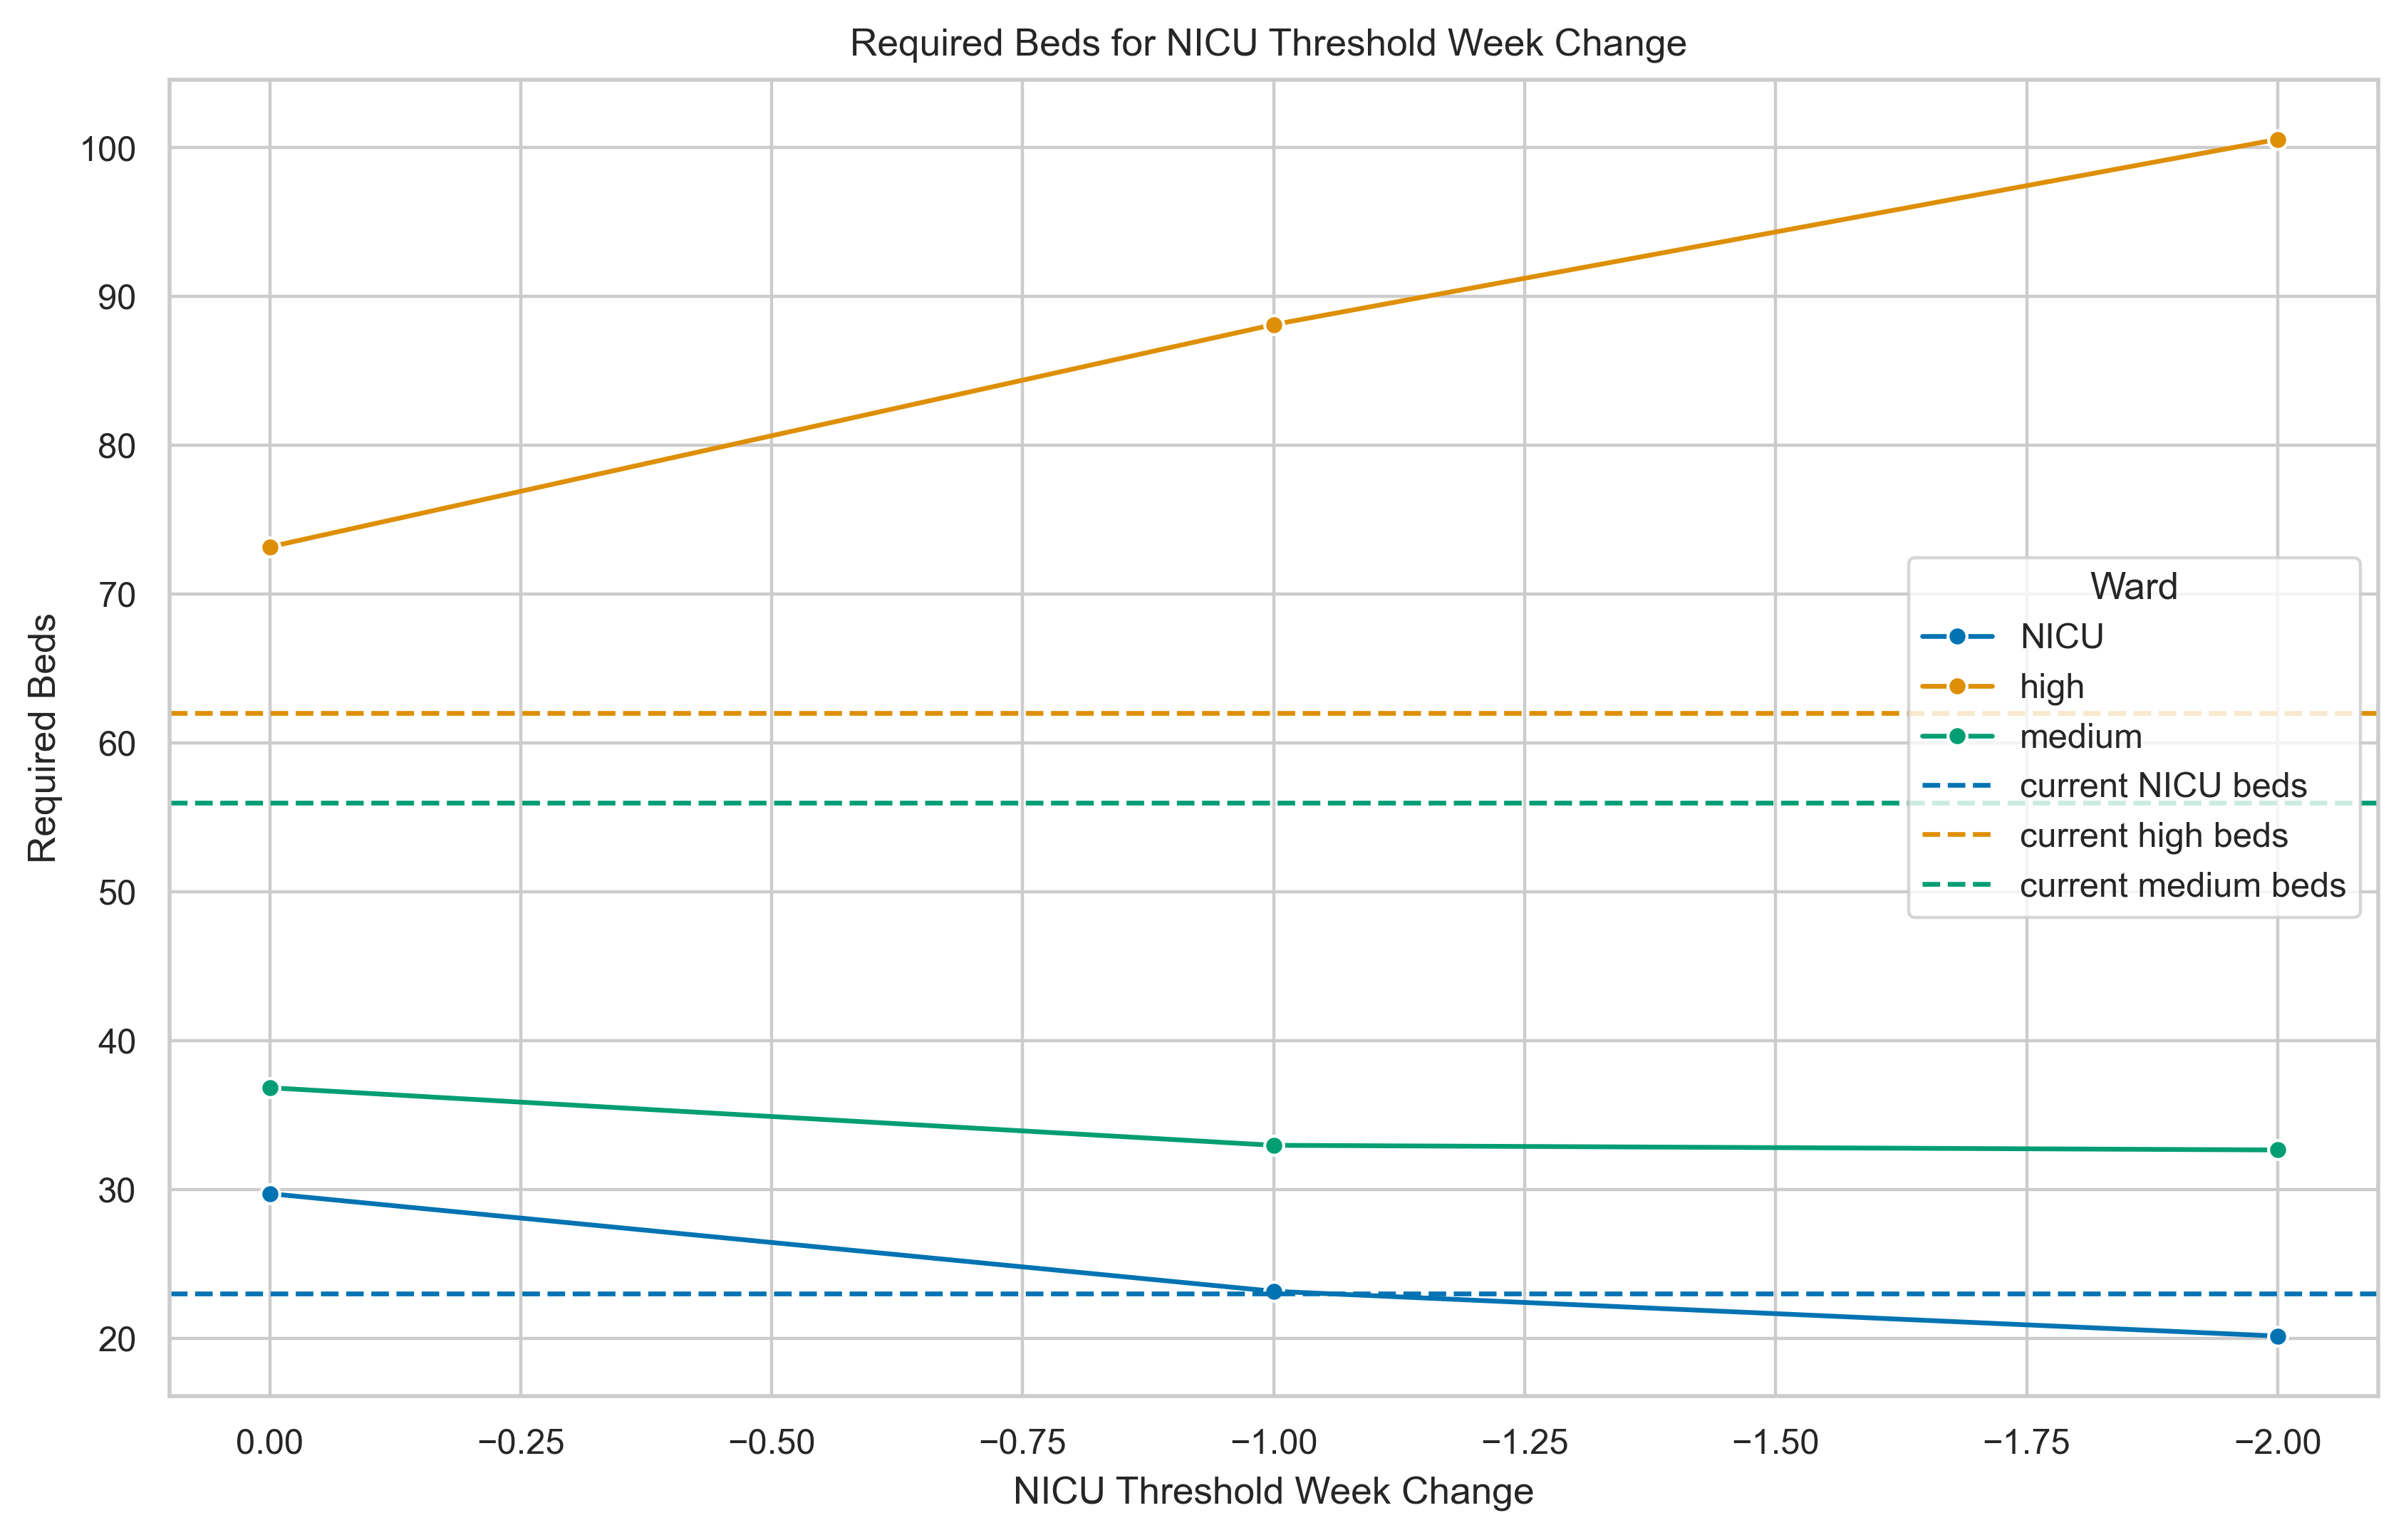

In [8]:
df = pd.DataFrame(final_usage)

plt.figure(figsize=(10, 6), dpi=400)
sns.lineplot(data=df, x=key, y='used', hue='ward', marker='o')
reference_values = {
    'NICU': 23,
    'high': 62,
    'medium': 56
}

# Extract the colors used for each ward level in the plot
palette = sns.color_palette()
wards = df['ward'].unique()
for ward, value in reference_values.items():
    color = palette[list(wards).index(ward)]  # Get the color for the specific ward
    plt.axhline(y=value, linestyle='--', color=color, label=f'current {ward} beds')

plt.title(f'Required Beds for {key_title} ')
plt.xlabel(key_title )
plt.ylabel('Required Beds')
plt.legend(title='Ward', loc='center right')  # Positioning the legend in the top right
# Reverse the x-axis to have it increasing to the left
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()


<h2>Capacity Transfer Rate </h2>

In [9]:
def filter_data_frames(data_frames):
    results = []
    for df in data_frames:
        df_outside = df[df['hospital'] == 'Outside Hospital']
        capacity_transfers = df_outside[df_outside['subregion'] != 'Outside Region']
        results.append(capacity_transfers)
    return results

# Example usage with the previously loaded data_frames
filtered_data_frames = filter_data_frames(admissions)

In [10]:
def calculate_percentages(df, capacity_transfers):
    results = []
    for run in capacity_transfers['run_id'].unique():
        run_results = {'run_id': run}
        for ward in capacity_transfers[capacity_transfers['subregion'] != 'Outside Region']['ward'].unique():
            ward_df = df[(df['ward'] == ward) & (df['run_id'] == run)]
            if len(ward_df) > 0:  # Ensure there are entries in ward_df to avoid division by zero
                ward_group = capacity_transfers[capacity_transfers['run_id'] == run].groupby('ward').size()
                if ward in ward_group:
                    percentage = ward_group[ward] / len(ward_df) * 100
                else:
                    percentage = 0  # Handle case where ward is not in ward_group
            else:
                percentage = 0  # Handle case where ward_df is empty
            run_results[ward] = percentage
        results.append(run_results)
    return pd.DataFrame(results)

def get_combination_string(settings, key, value):
    combination = []
    for k, v in settings.items():
        if k == key:
            combination.append(f"{k}={value}")
        elif isinstance(v, list):
            combination.append(f"{k}={v}")
        elif v != 0:  # Include only non-zero settings
            combination.append(f"{k}={v}")
    return " | ".join(combination)

def process_data_frames(data_frames, settings, key):
    summary_stats = []

    for i, df in enumerate(data_frames):
        value = settings[key][i] if isinstance(settings[key], list) else settings[key]

        # Filter and process each DataFrame
        df_outside = df[df['hospital'] == 'Outside Hospital']
        capacity_transfers = df_outside[df_outside['subregion'] != 'Outside Region']
        results_df = calculate_percentages(df, capacity_transfers)

        # Extract min, mean, and max from descriptive statistics
        desc_stats = results_df.describe().loc[['min', 'mean', 'max']]
        desc_stats['DataFrame'] = get_combination_string(settings, key, value)
        summary_stats.append(desc_stats)

    # Concatenate all the summary statistics into one table
    summary_table = pd.concat(summary_stats).reset_index().rename(columns={'index': 'Statistic'})

    return summary_table


summary_table = process_data_frames(admissions, settings, key)


#only show mean
summary_table[summary_table['Statistic'] == 'mean']

,Statistic,run_id,high,NICU,medium,DataFrame
1,mean,13.0,18.376684,26.639392,0.181940,hospitalScenario=1 | nicuThresholdLever=1 | nicuThresholdLeverChange=0
4,mean,13.0,30.276279,14.179675,0.023085,hospitalScenario=1 | nicuThresholdLever=1 | nicuThresholdLeverChange=-1
7,mean,13.0,38.356430,8.330844,0.025493,hospitalScenario=1 | nicuThresholdLever=1 | nicuThresholdLeverChange=-2


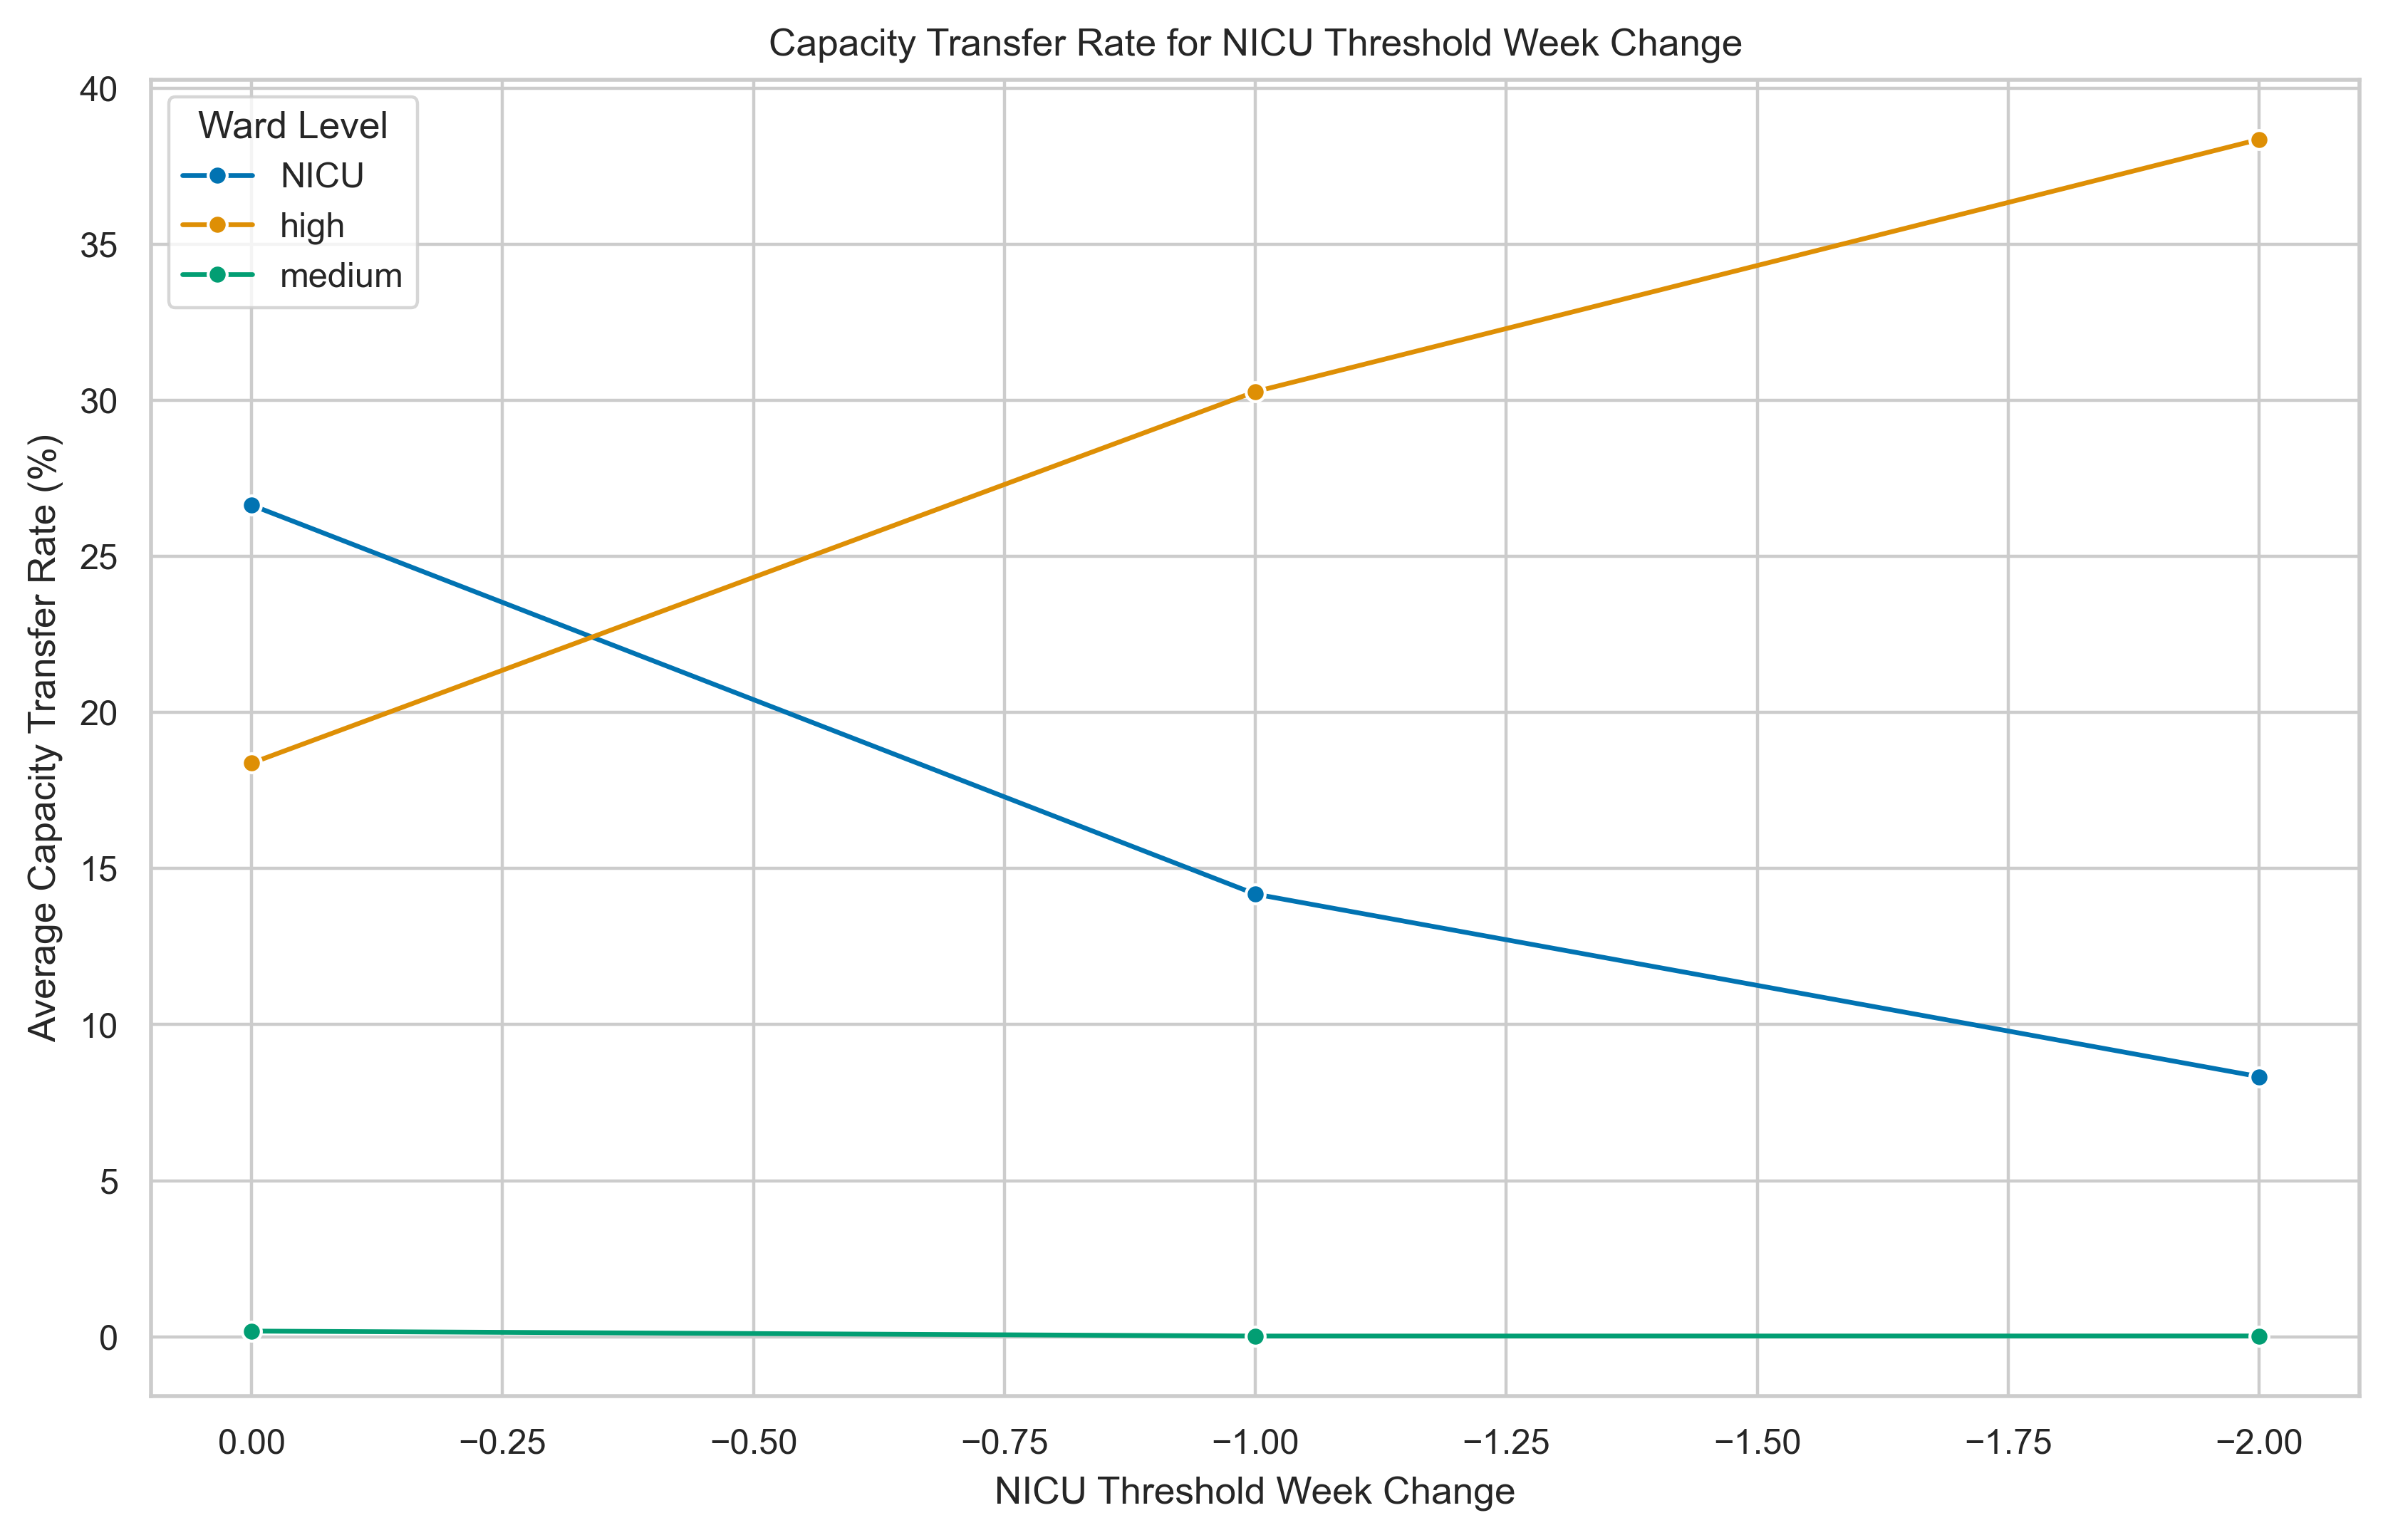

In [11]:
df = pd.DataFrame(summary_table)

# Extract losPercentageChange from DataFrame column
df[key] = df['DataFrame'].str.extract(fr'{key}=(-?\d+)').astype(int)

# Filter only mean values
mean_df = df[df['Statistic'] == 'mean']

# Melt the DataFrame for seaborn
melted_df = mean_df.melt(id_vars=[key], value_vars=['NICU', 'high', 'medium'], 
                         var_name='Ward Level', value_name='Average Capacity Transfer Rate')



plt.figure(figsize=(10, 6),dpi=400)
sns.lineplot(data=melted_df, x=key, y='Average Capacity Transfer Rate', hue='Ward Level', marker='o')

plt.ylabel('Average Capacity Transfer Rate (%)')
plt.title(f'Capacity Transfer Rate for {key_title}')
plt.xlabel(key_title + ' Change (%)')
if key == 'nicuThresholdLeverChange':
    plt.xlabel(key_title)
if key == 'pathwayLeverChange':
    plt.xlabel(key_title + ' LoS Change (days)')
plt.legend(title='Ward Level')
# Reverse the x-axis to have it increasing to the left
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()

<h2>Occupancy Rate </h2>

In [12]:
base_file_name = 'occupancy_by_hospital'
occupancy_rates = read_file(output_folder, base_file_name, NUMBER_RUNS, extension, **settings)


[{'hospitalScenario': 1, 'demandScenario': 0, 'demandScenarioPercentageChange': 0, 'nicu23WeeksScenario': 0, 'highCareAssignmentLever': 0, 'highCareAssignmentPercentageChange': 0, 'nicuAssignmentLever': 0, 'nicuAssignmentPercentageChange': 0, 'losLever': 0, 'losPercentageChange': 0, 'cpapLever': 0, 'cpapPercentageChange': 0, 'hfoLever': 0, 'hfoPercentageChange': 0, 'pathwayLever': 0, 'pathwayLeverChange': 0, 'phototherapyIntervention': 0, 'sepsisIntervention': 0, 'nicuThresholdLever': 1, 'nicuThresholdLeverChange': 0, 'nicuWaitTimeLever': 0, 'nicuWaitTimeLeverChange': 0}, {'hospitalScenario': 1, 'demandScenario': 0, 'demandScenarioPercentageChange': 0, 'nicu23WeeksScenario': 0, 'highCareAssignmentLever': 0, 'highCareAssignmentPercentageChange': 0, 'nicuAssignmentLever': 0, 'nicuAssignmentPercentageChange': 0, 'losLever': 0, 'losPercentageChange': 0, 'cpapLever': 0, 'cpapPercentageChange': 0, 'hfoLever': 0, 'hfoPercentageChange': 0, 'pathwayLever': 0, 'pathwayLeverChange': 0, 'photother

In [13]:
def process_occupancy_data(df_occupancy, warm_up_time):
    # Convert start_date to float
    df_occupancy['start_date'] = df_occupancy['start_date'].astype(float)
    
    # Calculate moving average and moving standard deviation per hospital and run
    df_occupancy['moving_average'] = df_occupancy.groupby(['hospital', 'run_id'])['occupancy'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
    df_occupancy['moving_std'] = df_occupancy.groupby(['hospital', 'run_id'])['occupancy'].transform(lambda x: x.rolling(window=7, min_periods=1).std())            
    df_occupancy['start_date'] = df_occupancy['start_date']
    
    return df_occupancy

def compare_occupancy_by_ward_level(data_frames, settings, key, warm_up_time):
    comparison_stats = []

    for i, df in enumerate(data_frames):
        # Process each DataFrame
        df_occupancy = process_occupancy_data(df, warm_up_time)
        
        # Calculate mean occupancy per ward level
        ward_level_stats = df_occupancy.groupby('ward_level').agg({'occupancy': 'mean'}).reset_index()
        ward_level_stats[key] = settings[key][i]  # Use the value from the settings key as the label
        
        comparison_stats.append(ward_level_stats)
    
    # Concatenate all the comparison statistics into one table
    comparison_table = pd.concat(comparison_stats)
    
    # Pivot the table so that losPercentageChange values are in a column and ward_level values are the column names
    comparison_table = comparison_table.pivot(index=key, columns='ward_level', values='occupancy').reset_index()
    
    # Rename the columns to remove the multi-level indexing
    comparison_table.columns.name = None

    return comparison_table

In [14]:
comparison_table = compare_occupancy_by_ward_level(occupancy_rates,settings,key, WARM_UP_TIME)


comparison_table

,nicuThresholdLeverChange,NICU,high,medium
0,-2,0.827016,0.994140,0.639241
1,-1,0.878199,0.987511,0.648053
2,0,0.936553,0.966985,0.719799


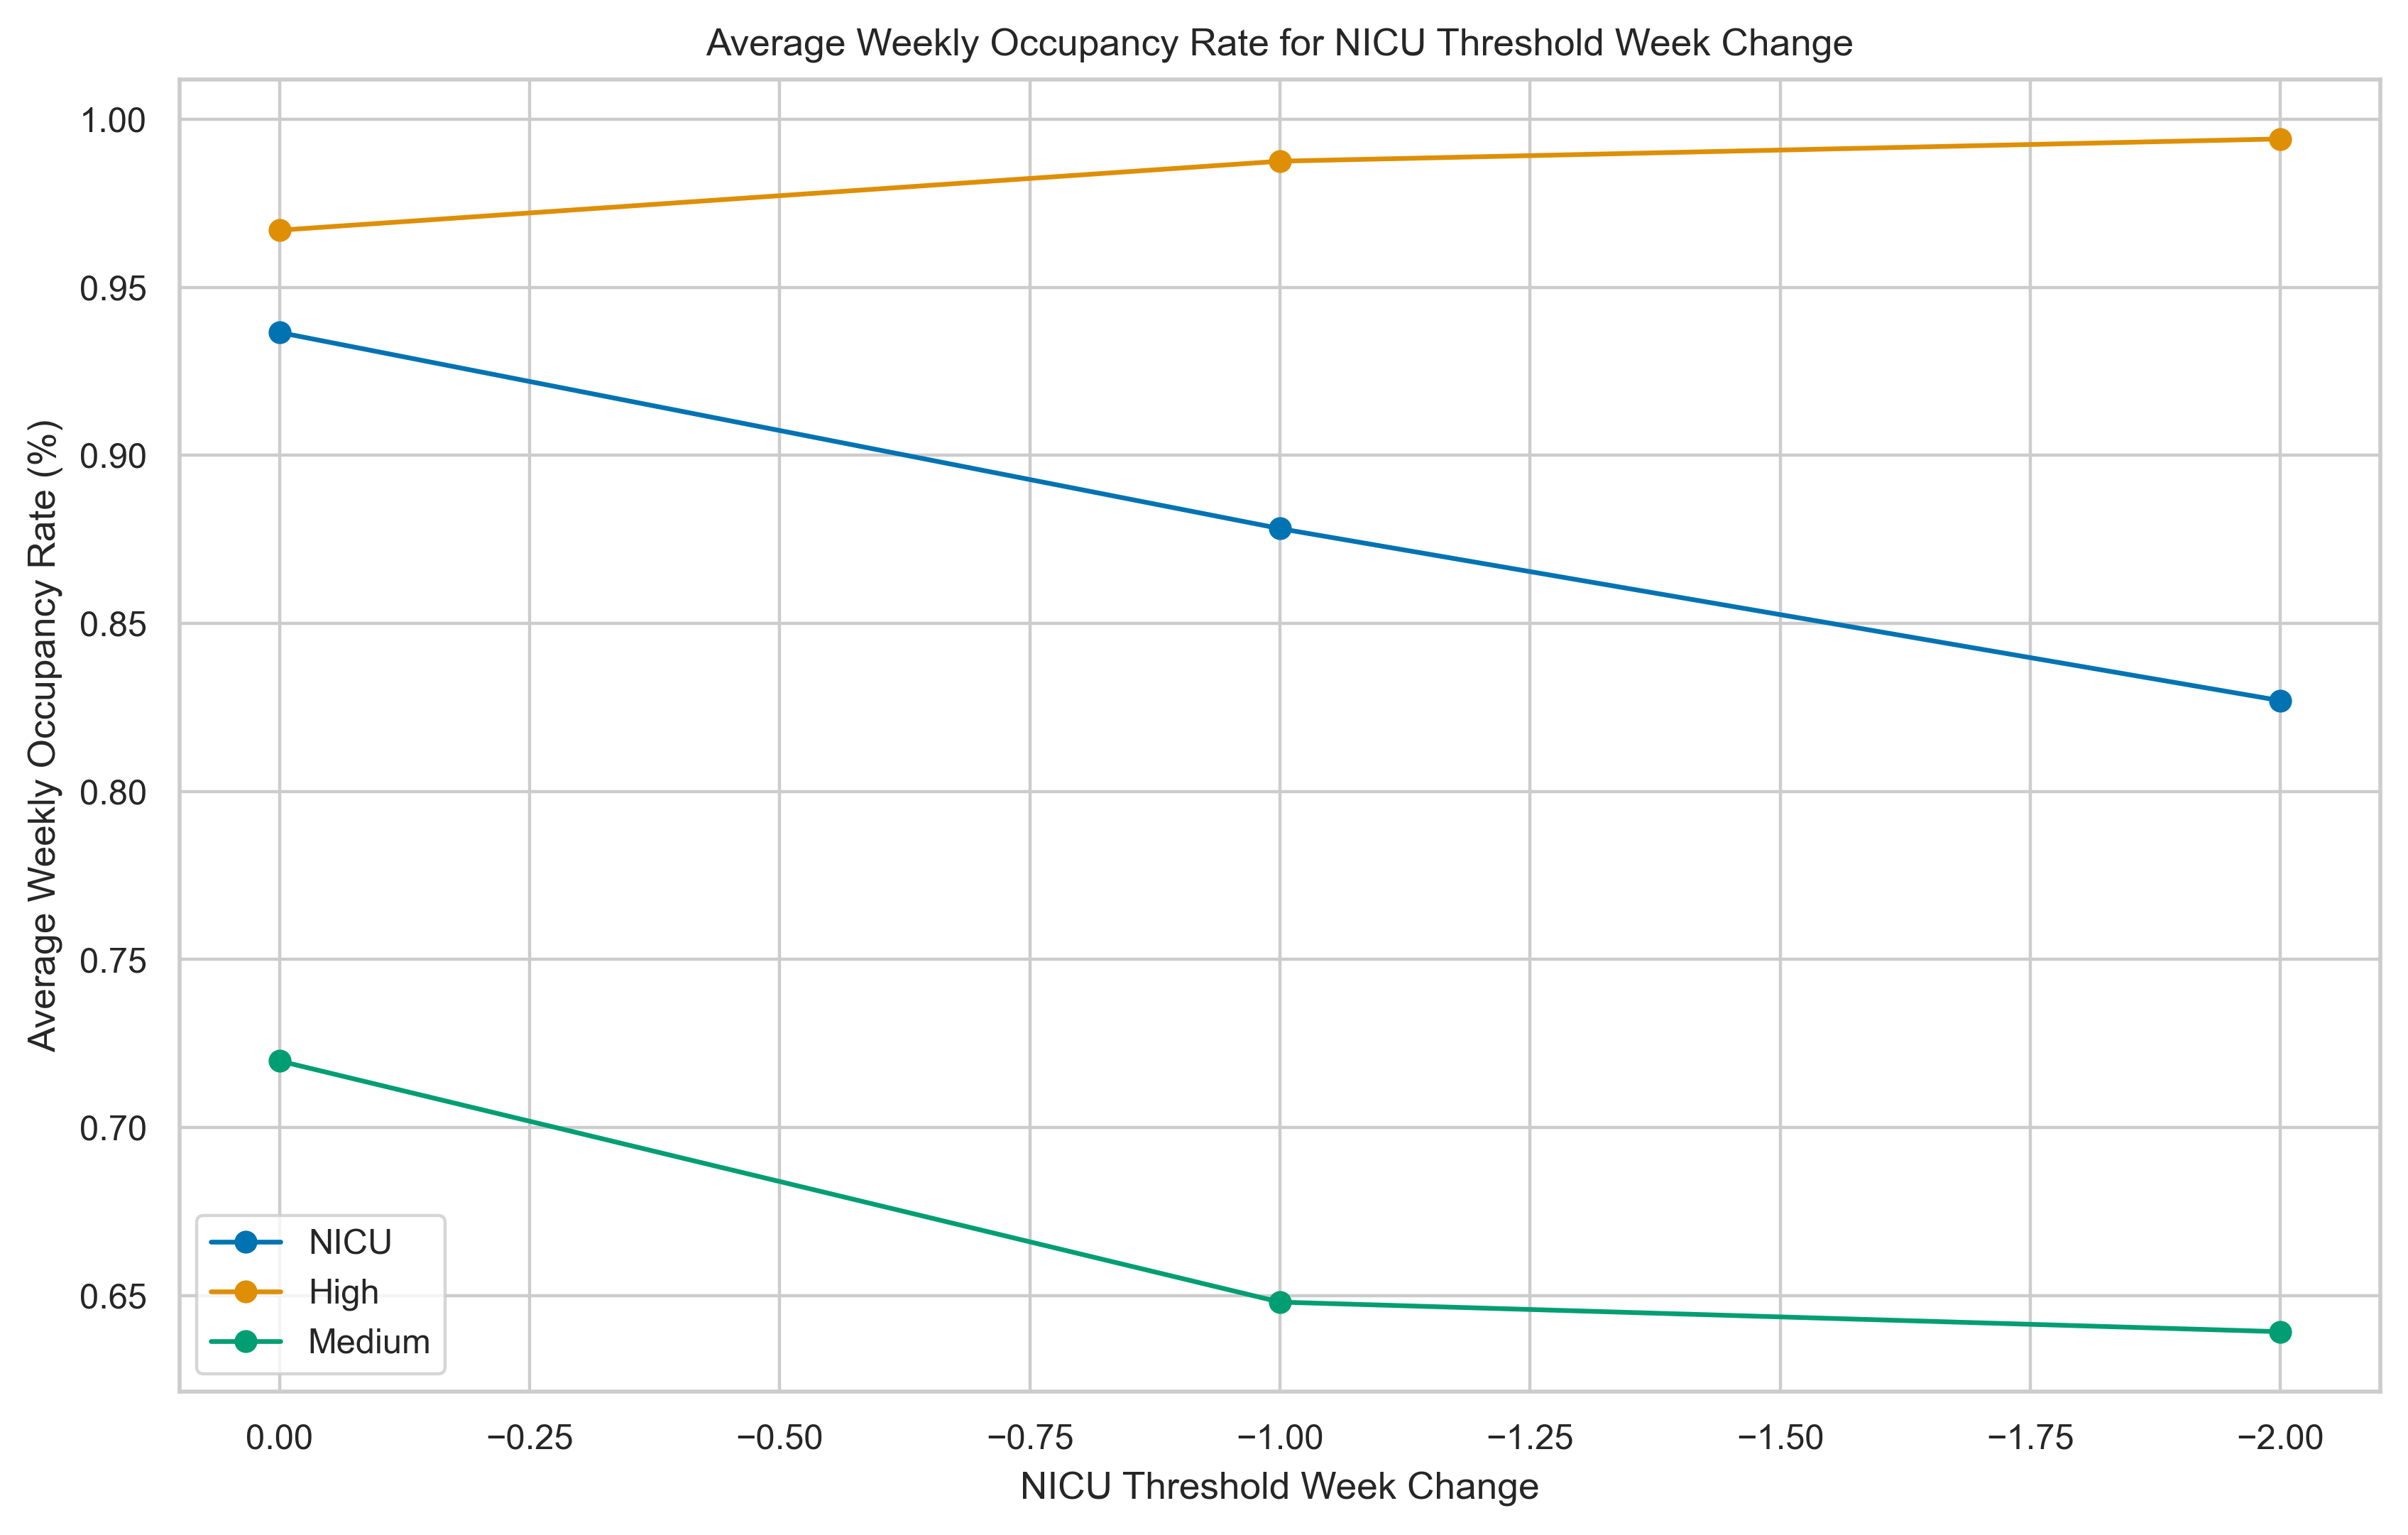

In [15]:
plt.figure(figsize=(10, 6),dpi=400)
df = comparison_table
# Plot each column
plt.plot(df[key], df['NICU'], marker='o', label='NICU')
plt.plot(df[key], df['high'], marker='o', label='High')
plt.plot(df[key], df['medium'], marker='o', label='Medium')

plt.ylabel('Average Weekly Occupancy Rate (%)')
plt.title(f'Average Weekly Occupancy Rate for {key_title}')
plt.xlabel(key_title+ ' Change (%)')
if key == 'nicuThresholdLeverChange':
    plt.xlabel(key_title)
if key == 'pathwayLeverChange':
    plt.xlabel(key_title + ' LoS Change (days)')
plt.legend()
plt.grid(True)
# Reverse the x-axis to have it increasing to the left
plt.gca().invert_xaxis()
plt.show()

<h2>Weekly Transfers</h2>

In [16]:
#no warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:


def process_occupancy_data(df_occupancy, warm_up_time):
    # Convert start_date to float
    df_occupancy['start_date'] = df_occupancy['start_date'].astype(float)
    
    # Calculate moving average per hospital and run
    df_occupancy['moving_average'] = df_occupancy.groupby(['hospital', 'run_id'])['occupancy'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
    
    # Adjust start_date by subtracting warm-up time
    df_occupancy['date'] = df_occupancy['start_date']
    
    return df_occupancy

def merge_and_calculate(data_frames, occupancy_rates, warm_up_time, key, key_values):
    all_weekly_transfer = []

    for i, (df_transfers, df_occupancy, key_value) in enumerate(zip(data_frames, occupancy_rates, key_values)):
        # Process occupancy data
        df_occupancy = process_occupancy_data(df_occupancy, warm_up_time)   
        # Aggregate transfer data
        transfer_agg = df_transfers.groupby(['run_id', 'start_date', 'ward']).size().reset_index(name='num_transfers')

        # Rename columns to match occupancy data for merging
        transfer_agg.rename(columns={'ward': 'ward_level', 'start_date': 'date'}, inplace=True)
        occupancy_agg = df_occupancy.groupby(['run_id', 'date', 'ward_level'], as_index=False).agg({'moving_average': 'mean'})

        # Set the minimum sample size threshold
        MIN_SAMPLE_SIZE = 20

        # Merge occupancy and transfer data
        occupancy_agg['run_id'] = occupancy_agg['run_id'].astype(int)
        transfer_agg['run_id'] = transfer_agg['run_id'].astype(int)
        merged_data = pd.merge(occupancy_agg, transfer_agg, how='left', on=['run_id', 'date', 'ward_level']).fillna({'num_transfers': 0})

        # Ensure 'num_transfers' is an integer
        merged_data['num_transfers'] = merged_data['num_transfers'].astype(int)

        # Group by and apply rolling window calculation within each group
        grouped = merged_data.groupby(['run_id', 'ward_level'])
        merged_data['transfer_count'] = grouped['num_transfers'].apply(lambda x: x.rolling(window=7, min_periods=1).sum()).reset_index(level=[0,1], drop=True)
        merged_data['transfer_count'].fillna(0, inplace=True)

        threshold_analysis = merged_data
        factor = 40
        threshold_analysis['moving_average_rounded'] = (threshold_analysis['moving_average'] * factor).round() / factor * 100

        # Calculate the weekly transfer for each occupancy rate and ward level
        weekly_transfer = threshold_analysis.groupby(['ward_level', 'moving_average_rounded']).apply(lambda x: x['transfer_count'].sum() / len(x)).reset_index(name='weekly_transfer')

        # Filter out occupancy rates with insufficient sample size
        sample_sizes = threshold_analysis.groupby(['ward_level', 'moving_average_rounded']).size().reset_index(name='sample_size')
        weekly_transfer = pd.merge(weekly_transfer, sample_sizes, on=['ward_level', 'moving_average_rounded'])
        weekly_transfer = weekly_transfer[weekly_transfer['sample_size'] >= MIN_SAMPLE_SIZE]

        # Drop the 'sample_size' column as it's no longer needed
        weekly_transfer = weekly_transfer.drop(columns=['sample_size'])
        weekly_transfer[key] = key_value 

        all_weekly_transfer.append(weekly_transfer)

    # Concatenate all weekly transfer data
    final_weekly_transfer = pd.concat(all_weekly_transfer)

    return final_weekly_transfer

def create_weekly_transfer_table(final_weekly_transfer, key):
    # Pivot the table so that key values are in a column and ward_level values are the column names
    weekly_transfer_table = final_weekly_transfer.pivot(index=key, columns='ward_level', values='weekly_transfer').reset_index()
    
    # Rename the columns to remove the multi-level indexing
    weekly_transfer_table.columns.name = None

    return weekly_transfer_table


# Extract key values
key_values = settings[key]

#final_weekly_transfer = merge_and_calculate(filtered_data_frames, occupancy_rates, WARM_UP_TIME, key, key_values)
final_weekly_transfer = merge_and_calculate(filtered_data_frames, occupancy_rates, WARM_UP_TIME, key, key_values)
final_weekly_transfer.head(20)


,ward_level,moving_average_rounded,weekly_transfer,nicuThresholdLeverChange
2,NICU,67.5,0.000000,0
3,NICU,70.0,0.000000,0
4,NICU,72.5,0.016949,0
5,NICU,75.0,0.062500,0
6,NICU,77.5,0.208333,0
7,NICU,80.0,0.241830,0
8,NICU,82.5,0.588517,0
9,NICU,85.0,0.743202,0
10,NICU,87.5,1.088409,0
11,NICU,90.0,1.870879,0


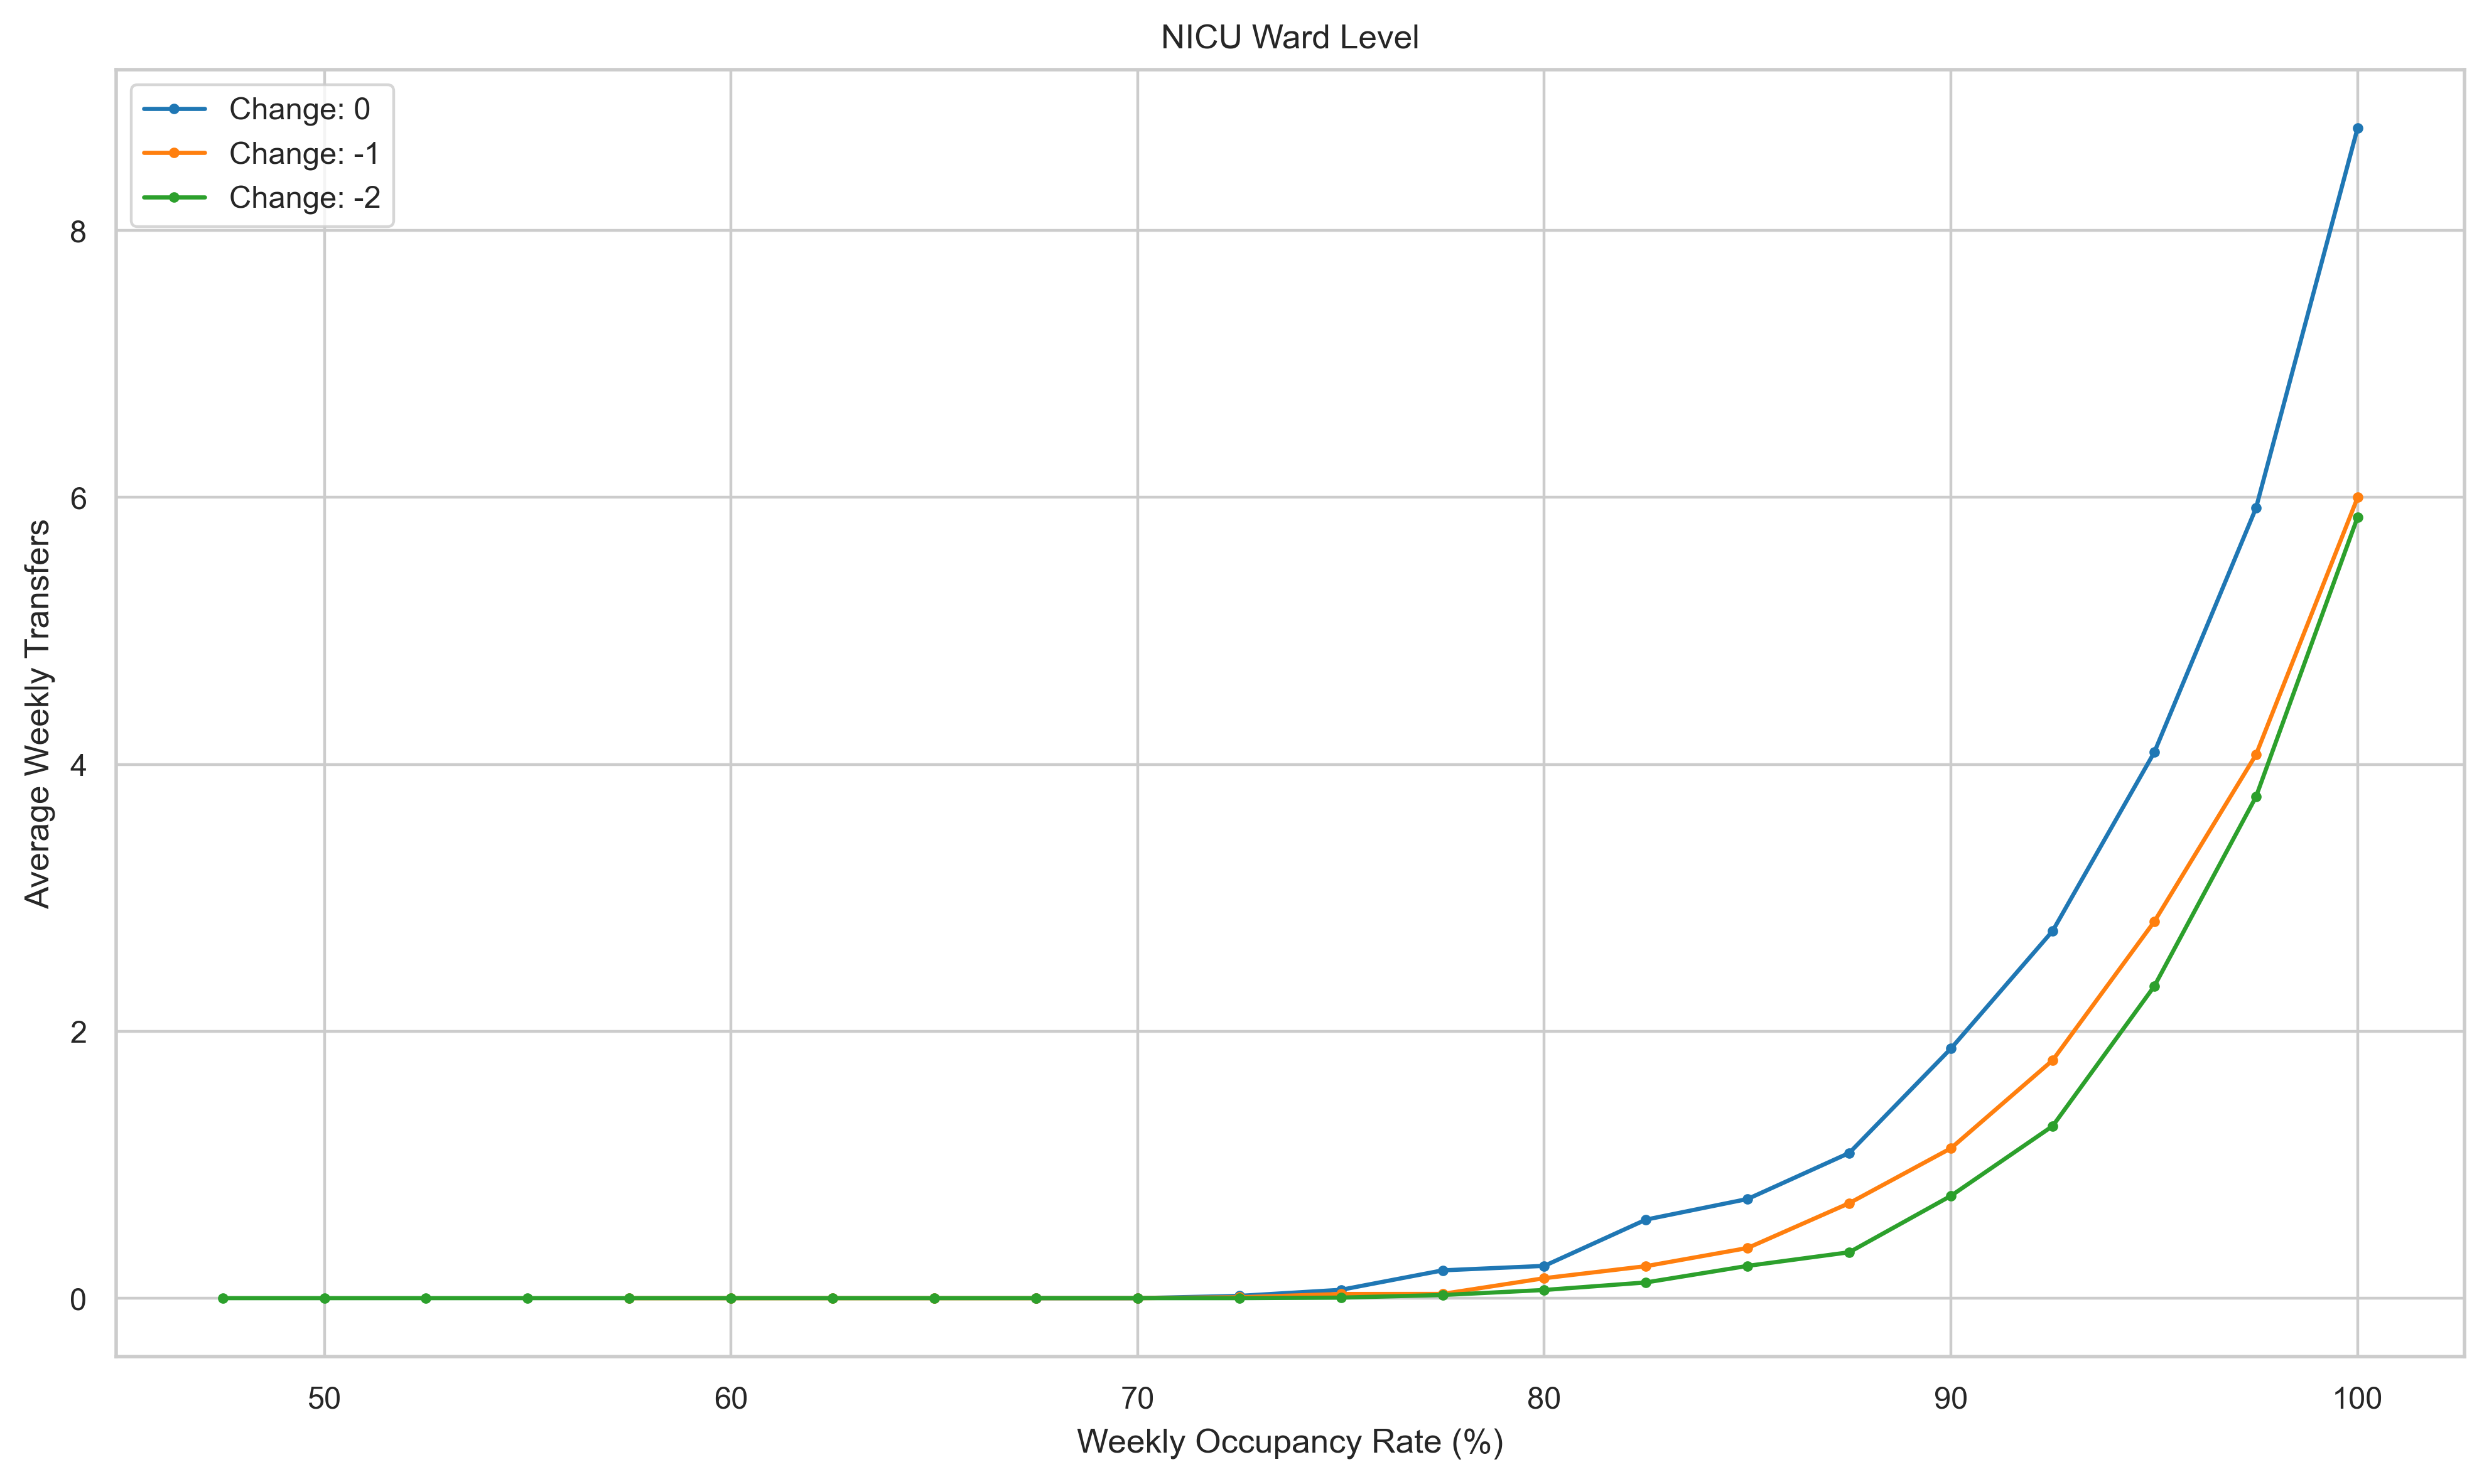

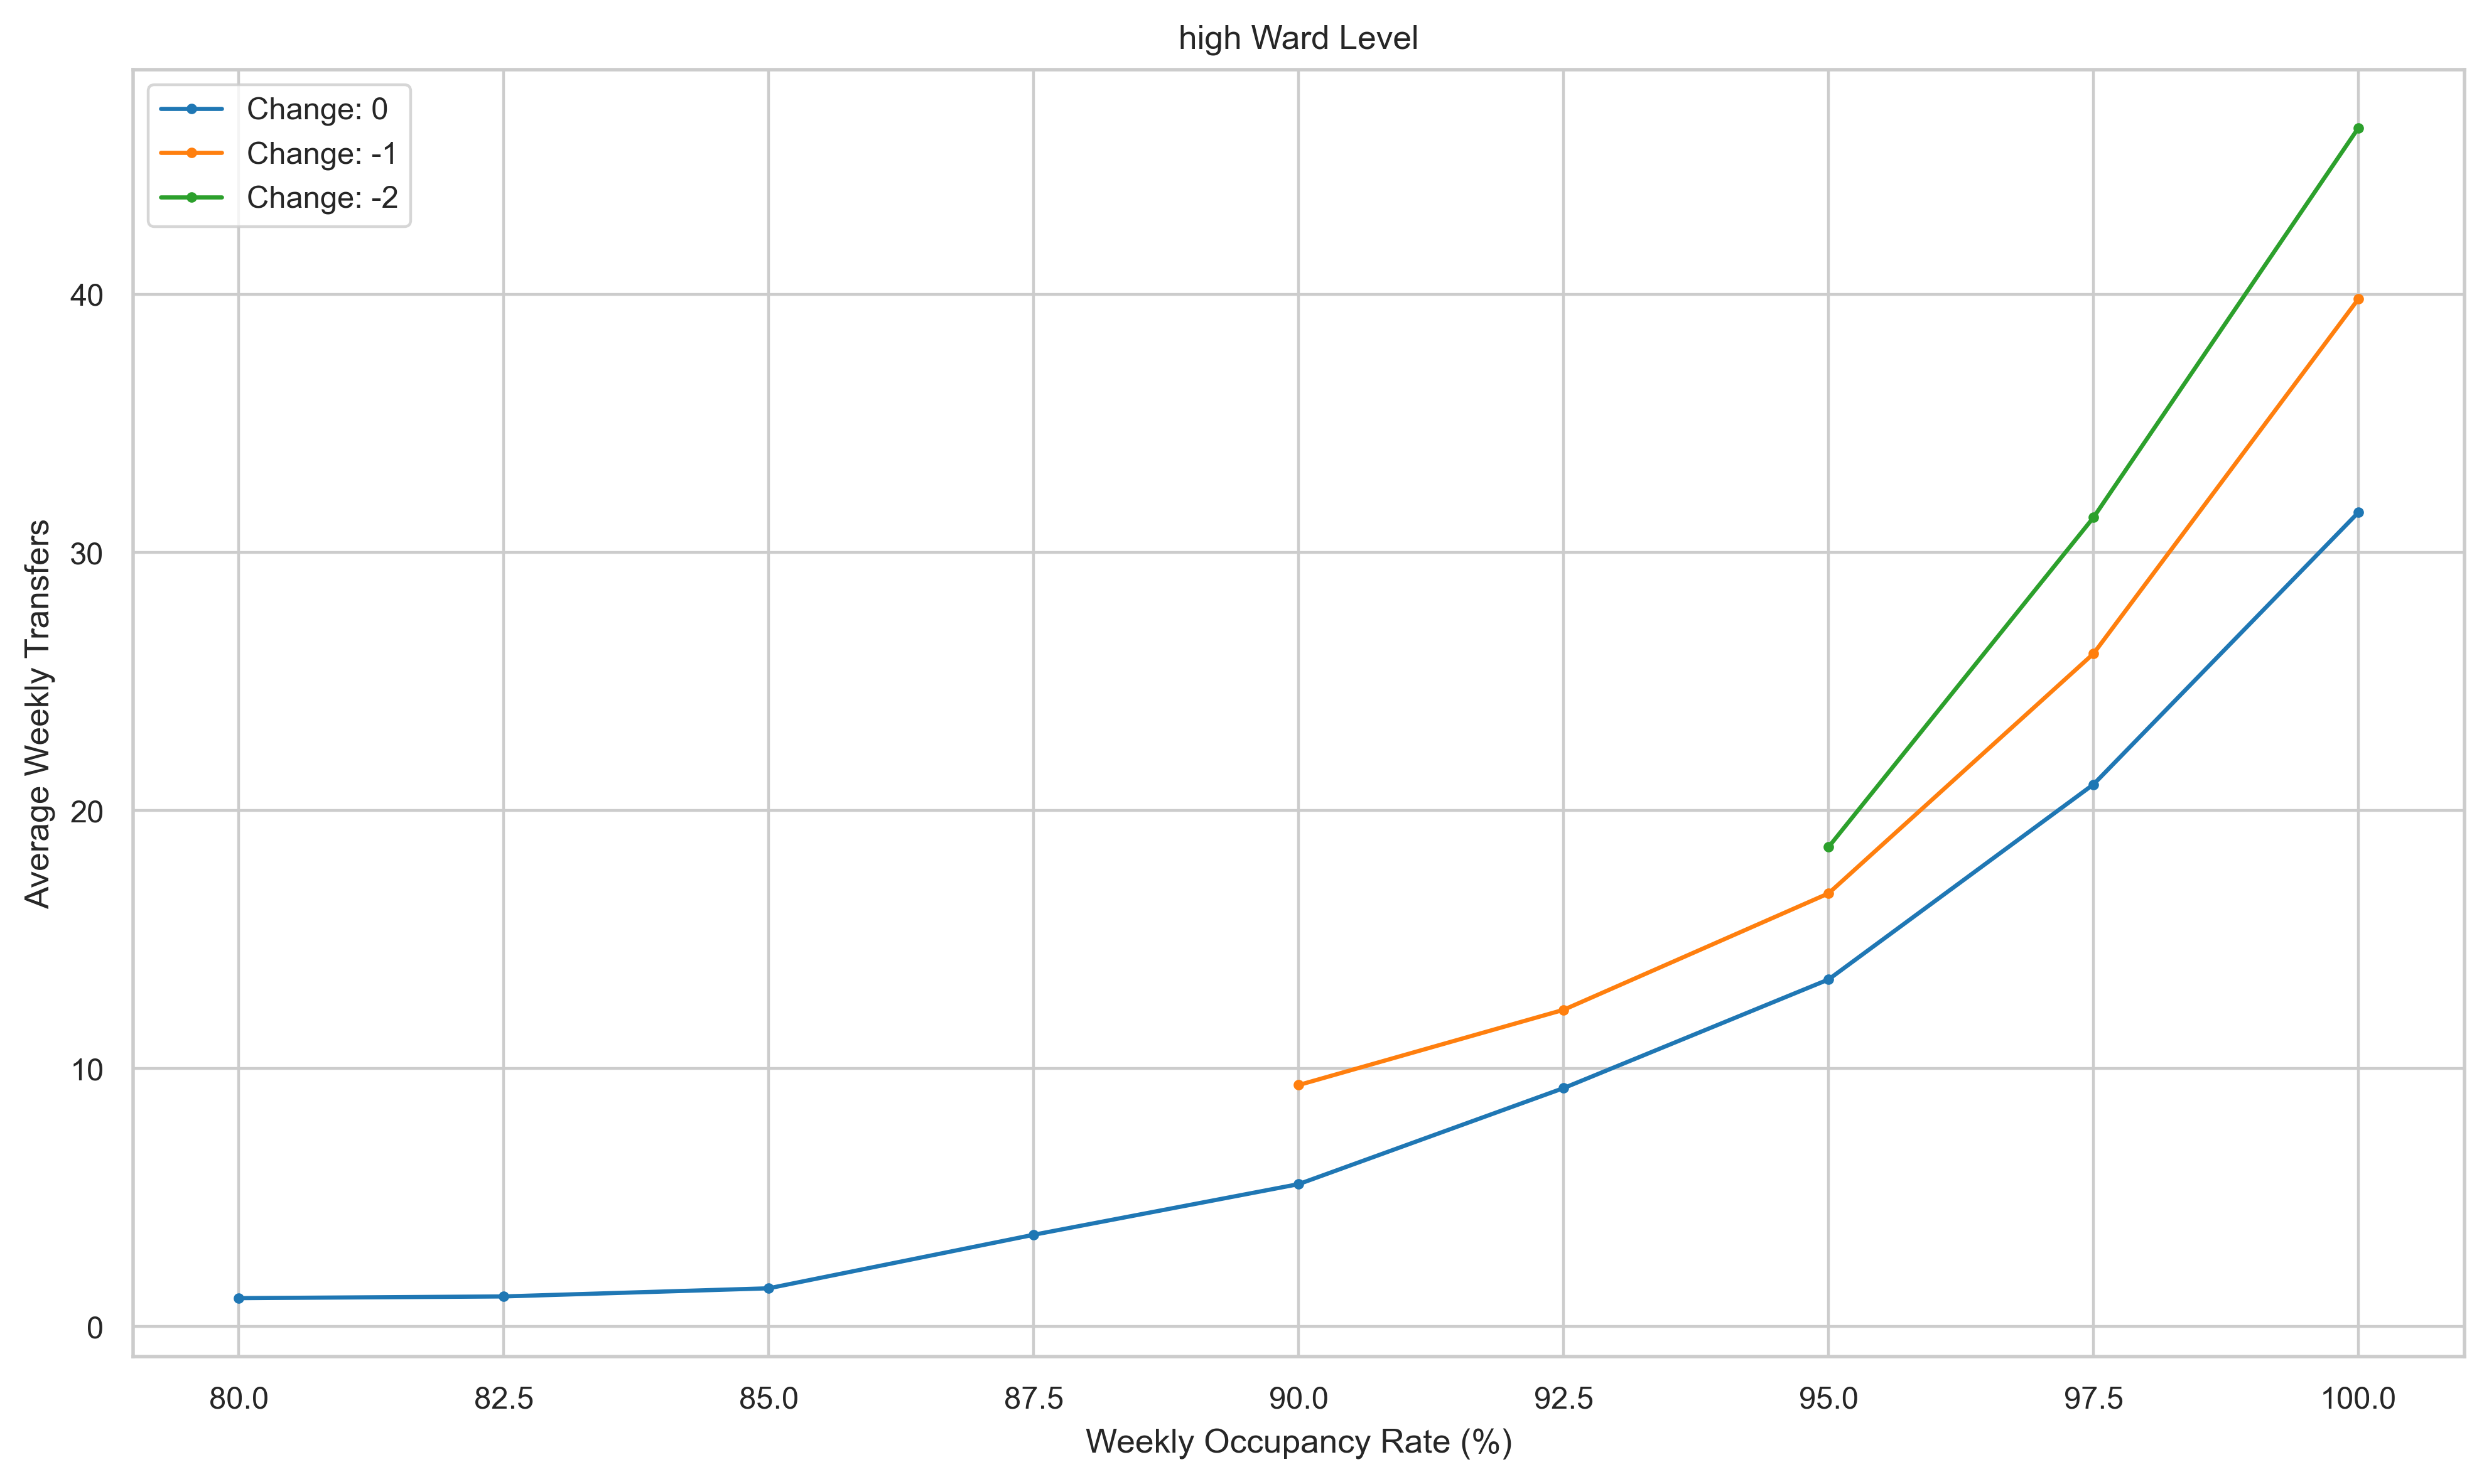

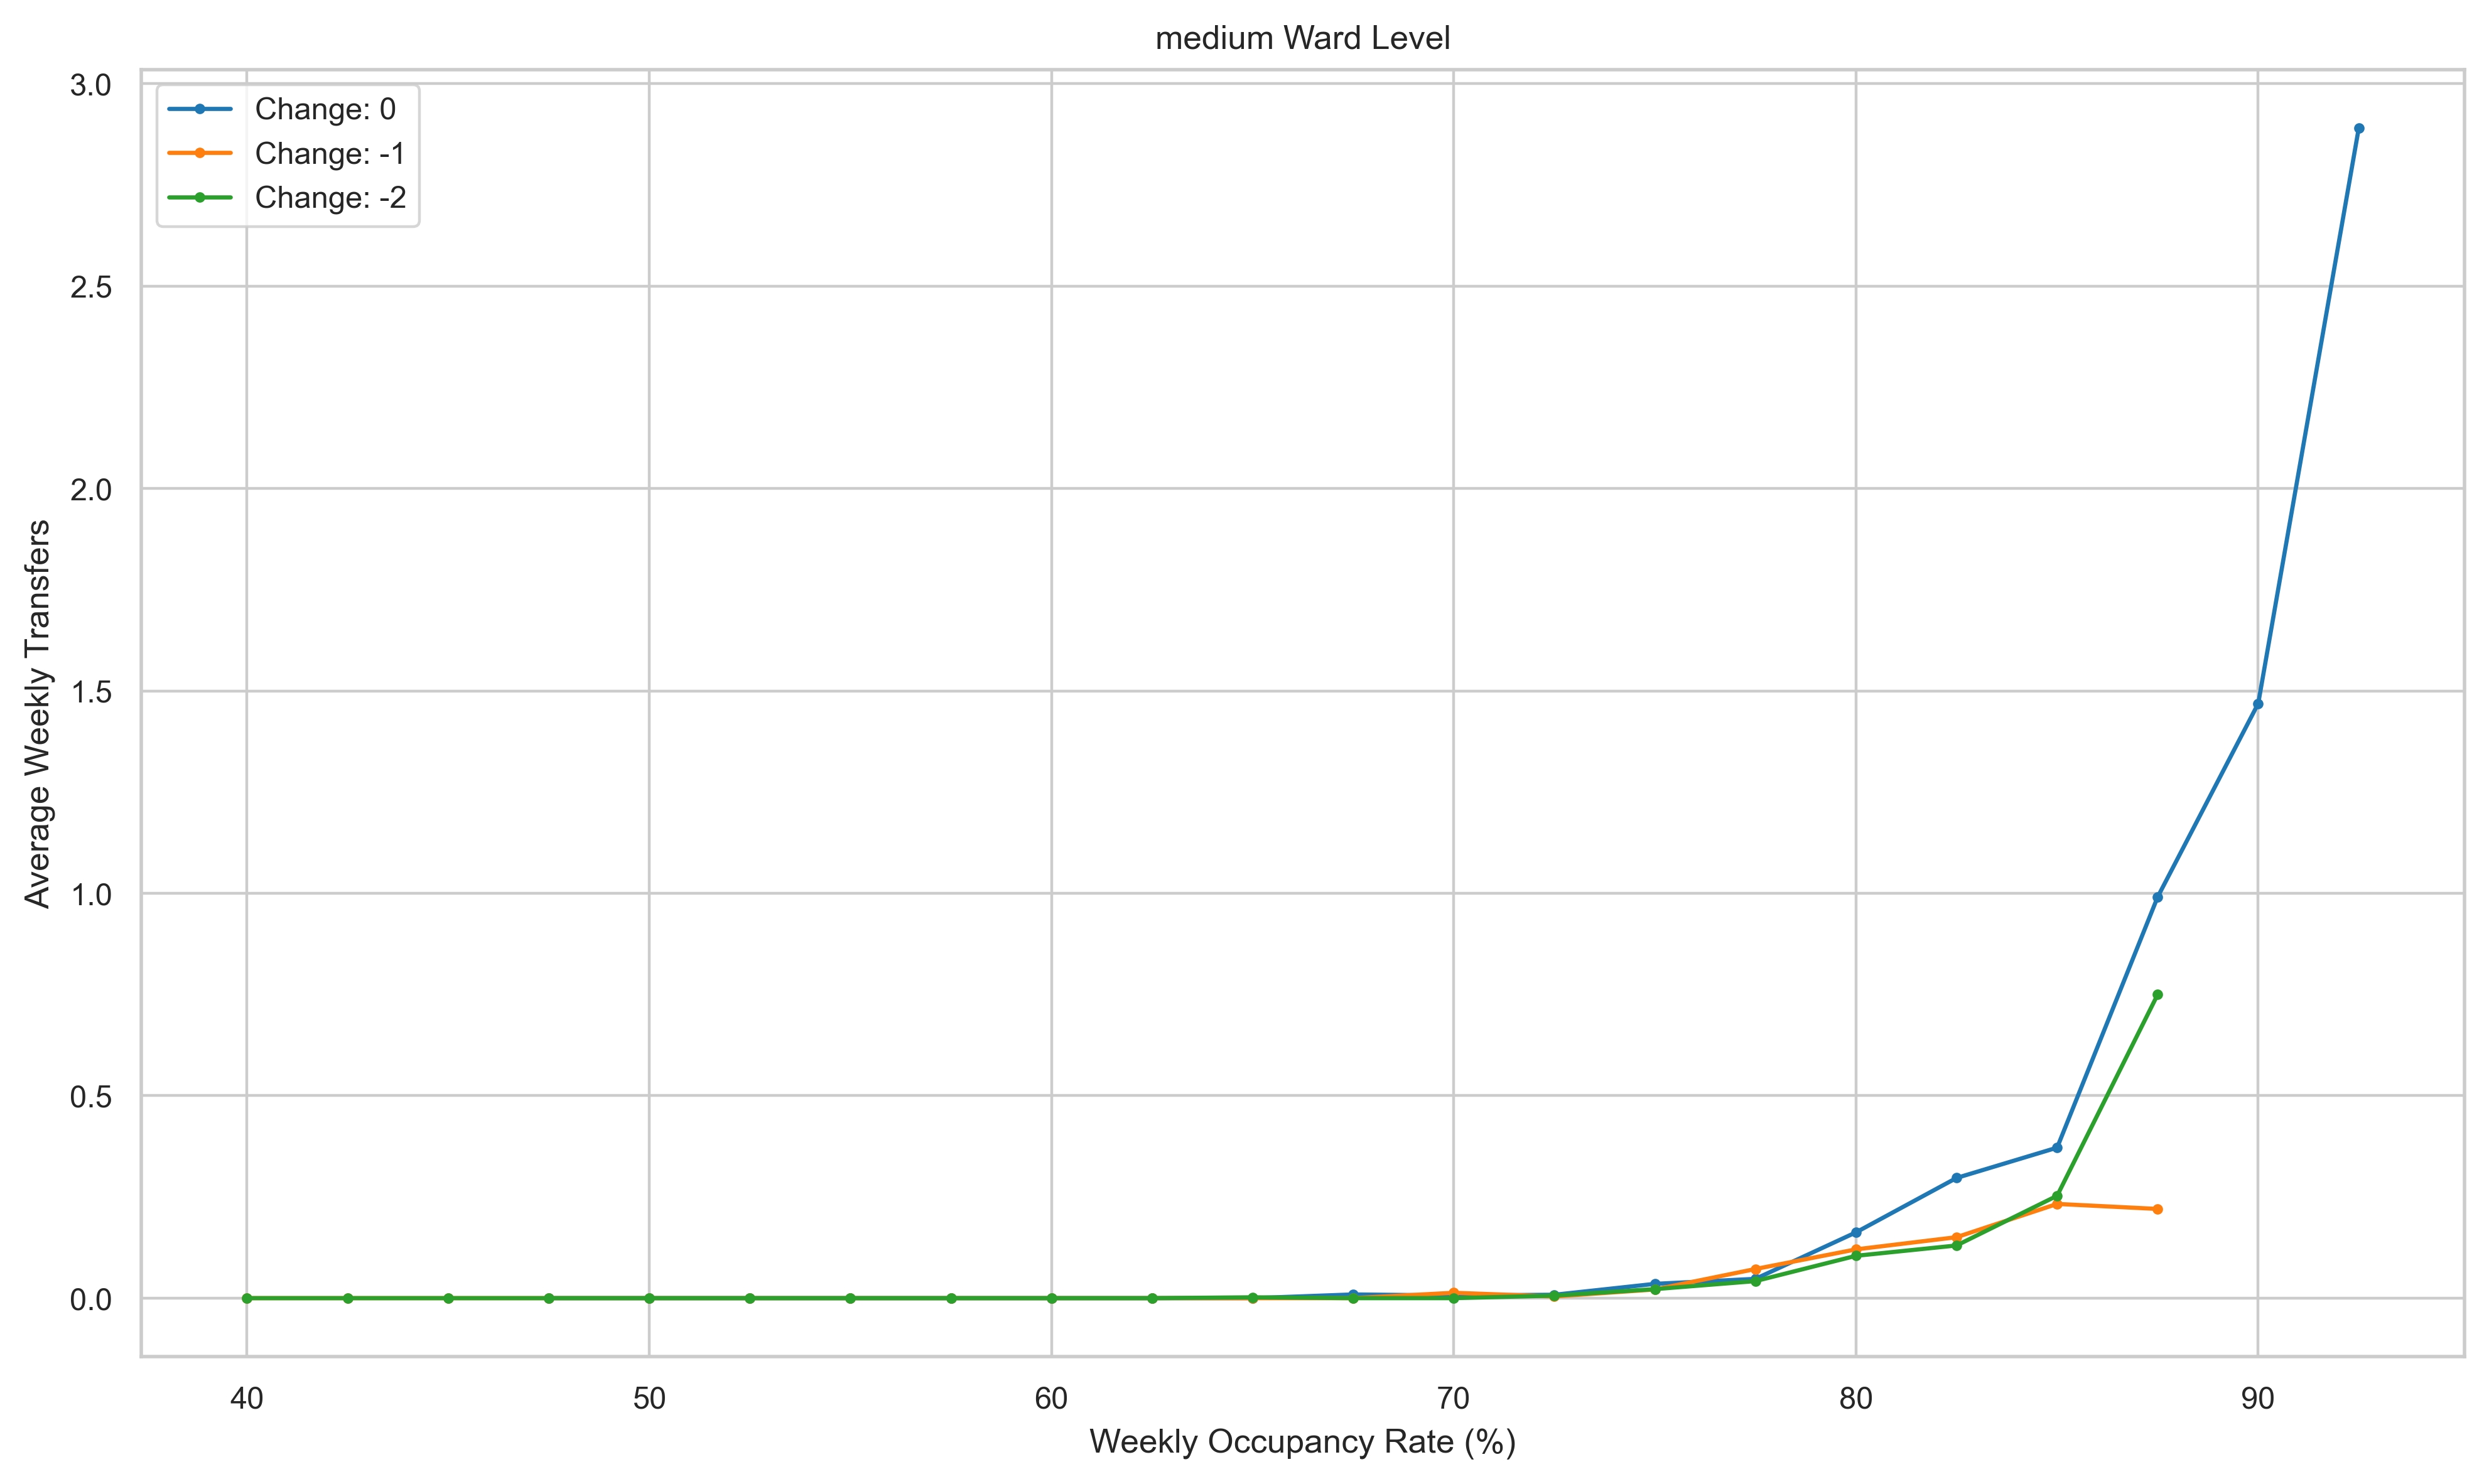

In [18]:
df = final_weekly_transfer
# Plotting
ward_levels = df['ward_level'].unique()
num_ward_levels = len(ward_levels)


palette = sns.color_palette("tab10", df[key].nunique())

# Create a color map
color_map = {los: color for los, color in zip(df[key].unique(), palette)}

# Separate graphs
for ward_level in ward_levels:
    subset = df[df['ward_level'] == ward_level]
    plt.figure(figsize=(10, 6), dpi=400)
    for los in subset[key].unique():
        los_subset = subset[subset[key] == los]
        plt.plot(los_subset['moving_average_rounded'], los_subset['weekly_transfer'], 
                 marker='o', markersize=2, label=f'Change: {los}', color=color_map[los])
    plt.title(f'{ward_level} Ward Level')
    plt.xlabel('Weekly Occupancy Rate (%)')
    plt.ylabel('Average Weekly Transfers')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
